In [1]:
#%%
import multiprocessing
import pandas as pd
import pickle
import argparse
from pathlib import Path
import os, sys
from itertools import repeat

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector

from pathos.pools import _ProcessPool, ProcessPool

# PROJ_PATH = Path(__file__).resolve().parents[2]
PROJ_PATH = Path().cwd().parents[1]
sys.path.append(PROJ_PATH.joinpath('src').as_posix())

from MyModule.utils import *
import random
config = load_config()

#%%

PROJ_PATH = Path(config['path_config']['project_path'])
INPUT_PATH = PROJ_PATH.joinpath('/mnt/synthetic_data/data/processed/1_apply_bayesian/preprocess_data/D1')
OUTPUT_PATH = PROJ_PATH.joinpath('/mnt/synthetic_data/data/processed/1_apply_bayesian/apply_bayesian/D1')

#%%

if not OUTPUT_PATH.exists():
    OUTPUT_PATH.mkdir(parents=True)

#%%

def load_categorical():
    with open(INPUT_PATH.joinpath('categorical_columns.pkl'),'rb') as f:
        return pickle.load(f)      

#%%
def load_data(name):
    '''
    returns the data and the categoricals
    '''
    path = INPUT_PATH.joinpath(f'pt_{name}.csv')
    df = pd.read_csv(path)
    categoricals = load_categorical()
    cats = set(df.columns.tolist()) & set(categoricals)
    cats = {cat : True for cat in cats}
    return df, cats

In [7]:
def create_bayesian(name, epsilon):
    _, cats = load_data(name)
    thresholds = config['bayesian_config']['threshold_value']
    degree_of_network = config['bayesian_config']['degree_of_network']
    num_tuples_to_generate = config['bayesian_config']['number_of_tuples']
    
    description_file = OUTPUT_PATH.joinpath(f'out/epsilon{epsilon}/description_{name}.json')
    synthetic_data = OUTPUT_PATH.joinpath(f'out/epsilon{epsilon}/synthetic_data_{name}.csv')
    
    if not OUTPUT_PATH.joinpath(f'out/epsilon{epsilon}').exists():
        OUTPUT_PATH.joinpath(f'out/epsilon{epsilon}').mkdir(parents=True)
    
    candidate_keys = {"PT_SBST_NO":True}
    
    describer = DataDescriber(category_threshold=thresholds)
    
    describer.describe_dataset_in_correlated_attribute_mode(dataset_file=INPUT_PATH.joinpath(f'pt_{name}.csv'),
                                                        epsilon=epsilon,
                                                        k=degree_of_network,
                                                        attribute_to_is_categorical=cats,
                                                        attribute_to_is_candidate_key=candidate_keys)
    describer.save_dataset_description_to_file(description_file)
    
#    generator = DataGenerator()
#    generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
#    generator.save_synthetic_data(synthetic_data)
    return

In [1]:
df = pd.read_pickle('/mnt/synthetic_data/data/processed/0_preprocess/D1.pkl')

NameError: name 'pd' is not defined

In [ ]:
df[df['PT_SBST_NO']==1511]

In [31]:
# df = pd.read_pickle('/mnt/synthetic_data/data/processed/0_preprocess/D0.pkl')

df[df.PT_BSNF_BSPT_IDGN_AGE < 50].to_pickle('/mnt/synthetic_data/data/processed/0_preprocess/D1.pkl')

In [ ]:
def main():
    # data = PROJ_PATH.joinpath('data/processed/0_preprocess/D0.pkl')
    argparse.ArgumentParser()
    data = read_file(Path('/mnt/synthetic_data/'), 'data/processed/0_preprocess/D1.pkl')
    patients = data['PT_SBST_NO'].unique().tolist()
    epsilons  = config['epsilon']
    
    random.seed(config['random_seed'])
    #sampled_patients = random.sample(patients, 100)
    
    epsilon = 0.1
    with _ProcessPool(16) as p :
        p.starmap(create_bayesian, zip(patients, repeat(epsilon)))
            
if __name__ == "__main__":
    main()

In [2]:
import pandas as pd
a = pd.read_pickle('/mnt/synthetic_data/data/processed/1_apply_bayesian/produce_data/D1/epsilon0.1/synthetic_data_765.pkl')

In [227]:
(a.columns)

Index(['TIME', 'DG_RCNF_RLPS', 'EX_DIAG_CEA',
       'OPRT_NFRM_OPRT_CLCN_OPRT_KIND_CD', 'OPRT_NFRM_OPRT_CURA_RSCT_CD',
       'PTH_BPSY_BPTH_BPSY_RSLT_CONT', 'PTH_BPSY_BPTH_CELL_DIFF_CD',
       'PTH_SRGC_SGPT_CELL_DIFF_CD', 'PTH_SRGC_SGPT_MTST_LN_CNT',
       'PTH_SRGC_SGPT_NERV_PREX_CD', 'PTH_SRGC_SGPT_PATL_N_STAG_VL',
       'PTH_SRGC_SGPT_PATL_T_STAG_VL', 'PTH_SRGC_SGPT_SRMG_DCTS_STAT_CD',
       'PTH_SRGC_SGPT_SRMG_PCTS_STAT_CD', 'PTH_SRGC_SGPT_SRMG_RCTS_STAT_CD',
       'PTH_SRGC_SGPT_SRMV_LN_CNT', 'PTH_SRGC_SGPT_VNIN_CD',
       'PTH_SRGC_SGPT_ANIN_CD', 'PT_BSNF_BSPT_FRST_DIAG_CD',
       'PT_BSNF_BSPT_IDGN_AGE', 'PT_BSNF_BSPT_M_STAG_VL',
       'PT_BSNF_BSPT_N_STAG_VL', 'PT_BSNF_BSPT_SEX_CD', 'PT_BSNF_BSPT_STAG_VL',
       'PT_BSNF_BSPT_T_STAG_VL', 'PT_BSNF_BSPT_FRST_DIAG_YMD',
       'DEAD_NFRM_DEAD'],
      dtype='object')

In [228]:
pd.read_csv('/mnt/synthetic_data/data/processed/1_apply_bayesian/preprocess_data/D0/pt_32.csv')

,TIME,DG_RCNF_RLPS,EX_DIAG_CEA,OPRT_NFRM_OPRT_CLCN_OPRT_KIND_CD,OPRT_NFRM_OPRT_CURA_RSCT_CD,PTH_SRGC_SGPT_CELL_DIFF_CD,PTH_SRGC_SGPT_MTST_LN_CNT,PTH_SRGC_SGPT_PATL_M_STAG_VL,PTH_SRGC_SGPT_PATL_N_STAG_VL,PTH_SRGC_SGPT_PATL_T_STAG_VL,...,PT_BSNF_BSPT_M_STAG_VL,PT_BSNF_BSPT_N_STAG_VL,PT_BSNF_BSPT_SEX_CD,PT_BSNF_BSPT_STAG_VL,PT_BSNF_BSPT_T_STAG_VL,PT_BSNF_BSPT_FRST_DIAG_YMD,TRTM_CASB_CSTR_NT,TRTM_CASB_CSTR_PRPS_CD,TRTM_CASB_CSTR_REGN_CD,DEAD_NFRM_DEAD
0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,1.0,NaN,NaN,NaN,0.0
1,4,0.0,5.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0
2,6,0.0,5.05,11.0,2.0,2.0,2.0,0.0,1.0,4.0,...,1.0,1.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0
3,13,0.0,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0
4,30,0.0,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,1.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1561,0.0,14.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,4.0,3.0,7.0,0.0
1157,1562,0.0,14.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,4.0,3.0,7.0,0.0
1158,1563,0.0,14.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,4.0,3.0,7.0,0.0
1159,1581,0.0,20.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0


In [248]:
def ldp(sen, ep):
    noise =  np.random.laplace(loc=0, scale = sen/ep)
    return noise

# multiply real number noise and imaginary number noise to each fourier coefficient, separtely
def add_noise(x, ep):
    sen = 1
    N = len(x)
    n = np.arange(N)
    noised_ft = []
    for i, ft in enumerate(x):
        noise1 =  ldp(sen,ep)
        noise2 =  ldp(sen,ep)
        ft += (noise1)
        #ft *= abs(np.exp(-2j*noise2))
        ft *= abs(np.exp(-2j*np.pi*i/N*noise2))
        noised_ft.append(ft)
    
    return noised_ft

/home/dogu86/.conda/envs/synthetic_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/dogu86/.conda/envs/synthetic_data/lib/python3.8/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


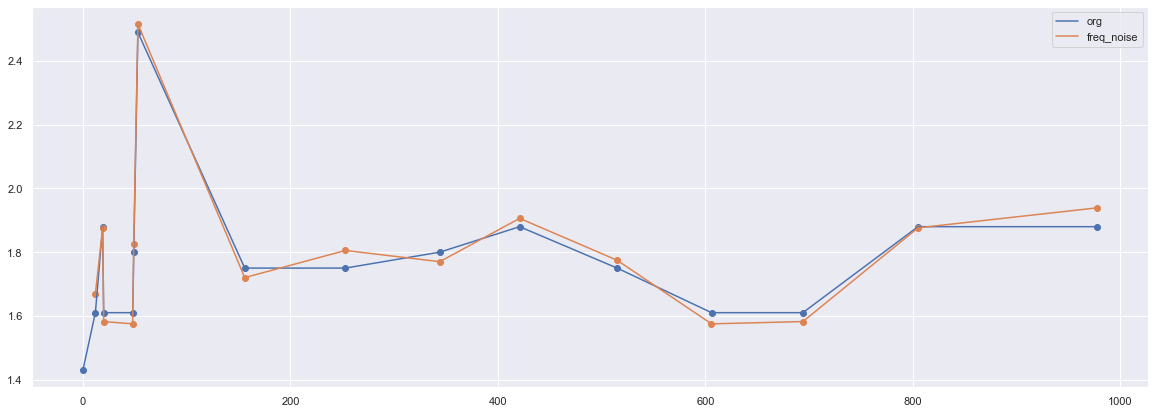

In [279]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

x = a['TIME']
y = a['EX_DIAG_CEA']
y_new_prev =[]


plt.figure(figsize = (20,7))
#fl = interp1d(x,y,kind = 'linear')
#fq = interp1d(x,y,kind = 'quadratic')

#xint = np.linspace(x.min(), x.max(), 1000)
#yintl = fl(xint)
#yintq = fq(xint)


#plt.plot(xint, yintl,'o' ,color = 'firebrick')
#plt.plot(xint, yintq, color = 'red', linewidth=2)
plt.plot(x,y, label='org')
plt.scatter(x,y)
#plt.legend(['Linear','Quadratic'])




ft = np.fft.fftn([x,y])

noised_ft = [add_noise(ft[0],5), add_noise(ft[1],5)]

ift = np.fft.ifftn(noised_ft)



#ift2 = np.fft.ifftn(ft)
#ift = np.fft.ifft(ift2)

plt.plot(ift[0][1:],ift[1][1:],label='freq_noise')
plt.scatter(ift[0][1:],ift[1][1:])
#plt.plot(x,y,'o', color = 'red')
plt.legend()
plt.show()



In [280]:
ift

array([[-2.55829127e-02-6.03961325e-14j,  1.20106895e+01+1.60971254e-02j,
         1.90274976e+01-6.14599493e-02j,  2.00338433e+01-1.43530337e-02j,
         4.79343255e+01+4.33258949e-02j,  4.89725436e+01+1.09317528e-02j,
         5.30336859e+01+3.99426578e-02j,  1.55987426e+02-3.42259831e-02j,
         2.53014798e+02+5.32907052e-14j,  3.43987426e+02+3.42259831e-02j,
         4.21033686e+02-3.99426578e-02j,  5.14972544e+02-1.09317528e-02j,
         6.05934326e+02-4.33258949e-02j,  6.94033843e+02+1.43530337e-02j,
         8.05027498e+02+6.14599493e-02j,  9.78010689e+02-1.60971254e-02j],
       [ 1.37937474e+00+3.55271368e-15j,  1.66927408e+00+1.78127634e-02j,
         1.87635490e+00-5.74536360e-02j,  1.58207331e+00-1.75482117e-02j,
         1.57494699e+00+7.95051195e-02j,  1.82462960e+00-7.63481253e-03j,
         2.51614854e+00+1.08245068e-02j,  1.72012343e+00+2.29017518e-02j,
         1.80531316e+00+3.55271368e-15j,  1.77012343e+00-2.29017518e-02j,
         1.90614854e+00-1.08245068e-0

/home/dogu86/.conda/envs/synthetic_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


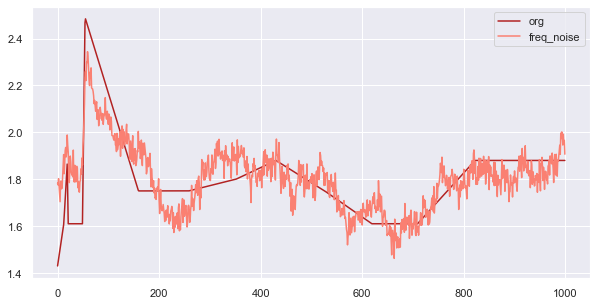

In [33]:
plt.figure(figsize = (10,5))
dft = np.fft.fft(yintl)
noised = add_noise(dft, 1)
plt.plot(yintl, label='org', color = 'firebrick')
plt.plot(np.fft.ifft(noised),label='freq_noise', color = 'salmon')
plt.legend()

In [10]:
import os
from pathlib import Path
path = Path('/mnt/synthetic_data/data/processed/1_apply_bayesian/produce_data/D1/epsilon0.1/')
pkls = (os.listdir(path))

In [17]:
path = Path('/mnt/synthetic_data/data/processed/1_apply_bayesian/produce_data/D1/epsilon/')
pkls = (os.listdir(path))

for pkl in pkls:
    temp = path.joinpath(pkl)
    temp_df = pd.read_pickle(temp)
    
    temp_df.to_csv(path.joinpath(pkl.split('.')[0]+'.csv'))

In [15]:
len(os.listdir(path))

1321

In [20]:
a = pd.read_pickle('/mnt/synthetic_data/data/processed/2_restore/restore_to_s1/D1/S1_0.1.pkl')

In [21]:
a

,PT_SBST_NO,TIME,DG_RCNF_RLPS,EX_DIAG_CEA,OPRT_NFRM_OPRT_CLCN_OPRT_KIND_CD,OPRT_NFRM_OPRT_CURA_RSCT_CD,PTH_BPSY_BPTH_BPSY_RSLT_CONT,PTH_BPSY_BPTH_CELL_DIFF_CD,PTH_MLCR_MLPT_BRME_RSLT_CD,PTH_MLCR_MLPT_KE2E_RSLT_CD,...,PT_BSNF_BSPT_SEX_CD,PT_BSNF_BSPT_STAG_VL,PT_BSNF_BSPT_T_STAG_VL,PT_BSNF_BSPT_FRST_DIAG_YMD,TRTM_CASB_CSTR_NT,TRTM_CASB_CSTR_PRPS_CD,TRTM_CASB_CSTR_REGN_CD,TRTM_RD_RDT,DEAD_NFRM_DEAD,Unnamed: 0
0,0,2222-02-22,0.0,1.490609,NaN,2.0,NaN,NaN,NaN,NaN,...,F,4.0,3.0,NaN,5.0,3.0,8.0,1.0,0.0,0.0
1,0,2222-03-02,0.0,1.179085,NaN,NaN,NaN,NaN,NaN,NaN,...,F,4.0,3.0,NaN,3.0,3.0,8.0,NaN,0.0,1.0
2,0,2222-03-29,0.0,0.908255,NaN,NaN,NaN,NaN,NaN,NaN,...,F,4.0,3.0,NaN,5.0,3.0,8.0,NaN,0.0,2.0
3,0,2222-04-04,0.0,1.844304,NaN,NaN,NaN,NaN,NaN,NaN,...,F,4.0,3.0,NaN,3.0,3.0,2.0,1.0,0.0,3.0
4,0,2222-04-17,0.0,1.419941,NaN,2.0,NaN,NaN,NaN,NaN,...,F,4.0,3.0,1.0,NaN,3.0,8.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,999,2222-10-18,0,1.930000,NaN,2.0,NaN,NaN,NaN,1.0,...,M,2.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0
6,999,2223-01-30,0,2.440000,NaN,2.0,NaN,NaN,NaN,1.0,...,M,2.0,3.0,NaN,NaN,NaN,NaN,NaN,0,6.0
7,999,2223-04-23,0,1.930000,NaN,NaN,NaN,NaN,NaN,1.0,...,M,2.0,3.0,NaN,NaN,NaN,NaN,NaN,0,7.0
8,999,2223-07-24,0,1.930000,NaN,2.0,NaN,NaN,NaN,1.0,...,M,2.0,3.0,NaN,NaN,NaN,NaN,NaN,0,8.0


In [23]:
a.PT_SBST_NO.nunique()

1321

In [30]:
a['PT_BSNF_BSPT_IDGN_AGE'].value_counts()

49.0    19965
48.0    19319
46.0    17643
45.0    15172
47.0    14173
40.0    12058
44.0    11818
43.0     9675
39.0     9430
41.0     8977
42.0     8108
38.0     7556
37.0     6507
36.0     6144
33.0     4390
34.0     4345
31.0     4212
30.0     2277
35.0     2222
22.0     2076
23.0     1237
29.0     1138
32.0     1075
21.0      708
27.0      606
16.0      481
20.0      465
26.0      452
24.0      376
28.0      267
19.0       17
14.0       12
Name: PT_BSNF_BSPT_IDGN_AGE, dtype: int64

In [ ]:
pd.read_csv('/mnt/synthetic_data/data/processed/4_evaluate/make_whole_data/D1/comparsion_data_0.1.csv')

In [6]:
import os

len(os.listdir('/mnt/synthetic_data/data/processed/1_apply_bayesian/apply_bayesian/D0/out/epsilon0.1'))

1871